In [349]:
# importing necessary libraries and functions

from sklearn import datasets
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [350]:
# importing the required datasets

from sklearn.datasets import fetch_20newsgroups
newsgroups=fetch_20newsgroups()

In [351]:
# keys in the dataset
newsgroups.keys()

dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR'])

In [352]:
x=newsgroups.data
y=newsgroups.target

In [380]:
## The target values 0,1,2,3...19 correspond to the target_names in the newsgroups
## meaning,
## 0 indicates alt.atheism category
## 1 indicates comp.graphics category and so on

In [353]:
# splitting the dataset into training and testing
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0)

In [354]:
import string

# list of stopwords taken from Internet

stopwords = ['i','me','my','myself','we','our','ours','ourselves','you',"you're","you've","you'll","you'd",'your','yours','yourself','yourselves','he','him','his','himself','she',"she's",'her','hers','herself','it',"it's",'its','itself','they',
 'them','their','theirs','themselves','what','which','who','whom','this','that',"that'll",'these','those','am','is','are','was','were','be',
 'been','being','have','has','had','having','do','does','did','doing','a','an','the','and',
 'but','if','or','because','as','until','while','of','at','by','for','with','about','against','between','into','through','during',
 'before','after','above','below',
 'to','from','up','down','in','out','on','off','over','under','again',
 'further','then','once','here','there','when','where','why','how','all','any','both','each',
 'few','more','most','other','some','such','no','nor','not','only','own','same','so','than','too','very','s','t','can','will','just',
 'don',"don't",'should',"should've",'now','d','ll','m','o','re','ve','y','ain','aren',"aren't",'couldn',"couldn't",'didn',"didn't",'doesn',"doesn't",'hadn',"hadn't",'hasn',"hasn't",'haven',"haven't",'isn',"isn't",'ma','mightn',"mightn't",'mustn','could','may',"mustn't",'needn',"needn't",'shan',"shan't",'shouldn',"shouldn't",'wasn',"wasn't",'weren',"weren't",'won',"won't",'wouldn',"wouldn't"]

In [355]:
# cleaning the data
# removing the digits and punctuations

def data_clean(sentence):
    
    # removing any digits present in the sentence
    sentence = list(''.join([i for i in sentence if not i.isdigit()]))
    
    # removing all the punctuation marks in the sentence
    p = list(sentence)
    for j in range(len(p)):
        if p[j] in string.punctuation:
            p[j]=''
            
    # return the complete sentence after joining the words
    return ''.join(p)

In [356]:
# dictionary to account for the frequency of all words in the documents

d={}
for i in range(len(x_train)):
    a = x_train[i].split('\n')
    for sentence in a:
        clean_sentence = data_clean(sentence)
        
        # removing stopwords
        for i in range(len(clean_sentence.split())):
            word=clean_sentence.split()[i].lower()
            if word in stopwords or len(word)<=2:
                continue
            
            # creating the dictionary
            d[word]=d.get(word,0) + 1

In [357]:
values=np.array(list(d.values()))
keys=np.array(list(d.keys()))

# sorting in descending order
index=np.argsort(values)
index=index[::-1]
values=values[index]
keys=keys[index]

In [358]:
# collecting the top words
# words within threshold, a particular cut-off.

threshold = 5000
features = keys[:threshold]

In [359]:
# creating the 2d array
# vocabulary is the 2d array

def get_2d_array(x,features):
    size=len(x)*threshold
    
    # 2d array 
    vocabulary = np.zeros(size).reshape(len(x),threshold)
    
    for i in range(len(x)):
        
        # splitting the paragraph into sentences
        a = x[i].split('\n')
        
        # iterating over sentences
        # and cleaning each one of them
        for sentence in a:
            clean_sentence = data_clean(sentence)
            
            for j in range(len(clean_sentence.split())):
                
                # convert word into lowercase
                word=clean_sentence.split()[j].lower()

                # if the word is a feature, we increase its count by 1
                if word in features:
                    index=np.where(features==word)
                    vocabulary[i][index]+=1
    return vocabulary

In [ ]:
## TEXT CLASSIFICATION USING MULTINOMIAL NAIVE BAYES ALREADY IMPLEMENTED IN SKLERN

In [360]:
# creating the 2d array with training data
# by calling function get_2d_array

x_train_2d_data=get_2d_array(x_train,features)

In [361]:
from sklearn.naive_bayes import MultinomialNB

# create classifier object
clf=MultinomialNB()

# fitting the classifier using training data
clf.fit(x_train_2d_data,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [362]:
# creating the 2d array with testing data
x_test_2d_data=get_2d_array(x_test,features)

In [363]:
# predict the output using inbuilt predict function
y_predict=clf.predict(x_test_2d_data)

In [365]:
# Printing the Classification report and 
# Confusion Matrix 
# using INBUILT Multinomial Naive Bayes 

from sklearn.metrics import classification_report, confusion_matrix
print('CLASSIFICATION REPORT')
print()
print(classification_report(y_test,y_predict))
print()
print('CONFUSION MATRIX')
print()
print(confusion_matrix(y_test,y_predict))

CLASSIFICATION REPORT

              precision    recall  f1-score   support

           0       0.79      0.89      0.84       112
           1       0.63      0.81      0.71       147
           2       0.81      0.77      0.79       140
           3       0.70      0.71      0.71       148
           4       0.74      0.83      0.78       149
           5       0.86      0.79      0.82       159
           6       0.73      0.84      0.78       131
           7       0.86      0.82      0.84       158
           8       0.88      0.90      0.89       162
           9       0.93      0.95      0.94       148
          10       0.95      0.97      0.96       150
          11       0.99      0.91      0.95       155
          12       0.81      0.73      0.77       147
          13       0.96      0.87      0.91       131
          14       0.96      0.90      0.93       154
          15       0.93      0.90      0.91       155
          16       0.87      0.93      0.90       144
    

[]

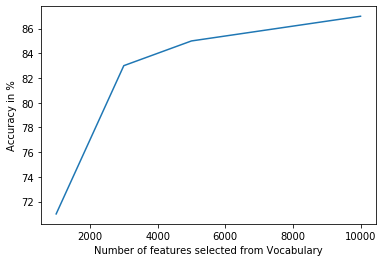

In [367]:
# After running the code for some different values of threshold,
# I have plotted the graph
# for Accuracy achieved vs No. of features taken
# Accuracy increases as the words taken increased 
# but the time taken also increases.


accuracy=[71,83,85,87]
Number_of_features=[1000,3000,5000,10000]
import matplotlib.pyplot as plt
plt.plot(Number_of_features,accuracy)
plt.xlabel('Number of features selected from Vocabulary')
plt.ylabel('Accuracy in %')
plt.plot()

In [368]:
# IMPLEMENTING MULTINOMIAL NAIVE BAYES FROM SCRATCH ON MY OWN FOR TEXT CLASSIFICATION

In [369]:
# defining the fit function

def fit(x_train,y_train):
    
    x_train=np.array(x_train)
    y_train=np.array(y_train)
    
    result={}
    
    # unique values in the output
    class_values=set(y_train)
    
    # iterating over each output of class
    for current_class in class_values:
        
        result[current_class]={}
        
        result['total_data']=len(y_train)
        
        # rows of current class
        bool_arr = (y_train==current_class)
        
        # training data for current class
        x_train_current=x_train[bool_arr]
        y_train_current=y_train[bool_arr]
        
        # storing the count of rows for which oytput is current class
        result[current_class]['total_count']=len(y_train_current)
        
        total_words_current_class = 0
        
        for i in range(len(features)):
            
            # count of feature i in current_class
            count=(x_train_current[:,i]).sum()
            result[current_class][i] = count
            
            # finding the total count of words in the document i.e. in the current class
            total_words_current_class += count
        
        # storing the total count of words in a given document in dictionary
        result[current_class]['total_words'] = total_words_current_class
        
    return result

In [370]:
def probability(dictionary,x,current_class):
    
    import numpy as np
    
    # prior probability
    output = np.log(dictionary[current_class]['total_count']) - np.log(dictionary['total_data'])
    
    for j in range(len(x)):
        xj=x[j]
        
        # if a particular word doesn't exist in the document
        # that is, its frequency is 0
        # we simply don't consider the word in calculations
        if xj>0:
            
            # Numerator
            # Add 1 for Laplace Correction
            nr = dictionary[current_class][j]+1
            
            # Denominator
            # Add number of features for laplace correction
            dr = dictionary[current_class]['total_words'] + len(features)
            
            # probability
            p = nr/dr
            
            output += np.log(p)
        
    return output
            

In [371]:
def predictSinglePoint(dictionary,x):
    
    # output classes
    classes=dictionary.keys()
    
    best_p=-1000
    best_class=-1
    first_run=True
    
    for current_class in classes:
        if (current_class=='total_data'):
            continue
            
        # probability that x belongs to this class
        p_current_class = probability(dictionary,x,current_class)
        
        # finding the largest probability
        if (first_run or p_current_class > best_p):
            best_p = p_current_class
            best_class = current_class
        first_run = False
        
    return best_class

In [372]:
def predict(dictionary,x_test):
    
    # array for the predictions of the testing data
    y_pred=[]
    
    # iterating over each point in the dataset to find the output class
    for x in x_test:
        x_class = predictSinglePoint(dictionary,x)
        y_pred.append(x_class)
    
    # return the predicted output for testing data
    return y_pred

In [373]:
dictionary= fit(x_train_2d_data,y_train)

In [374]:
y_predict_self = predict(dictionary,x_test_2d_data)

In [375]:
# Printing the Classification report and 
# Confusion Matrix 
# using OUR OWN CODE OF Multinomial Naive Bayes 

print('CLASSIFICATION REPORT')
print()
print(classification_report(y_test,y_predict_self))
print('CONFUSION MATRIX')
print(confusion_matrix(y_test,y_predict_self))

CLASSIFICATION REPORT

              precision    recall  f1-score   support

           0       0.79      0.88      0.84       112
           1       0.62      0.82      0.71       147
           2       0.79      0.76      0.78       140
           3       0.75      0.68      0.71       148
           4       0.71      0.81      0.76       149
           5       0.87      0.74      0.80       159
           6       0.69      0.85      0.76       131
           7       0.85      0.80      0.82       158
           8       0.85      0.91      0.88       162
           9       0.94      0.94      0.94       148
          10       0.97      0.94      0.96       150
          11       0.99      0.90      0.94       155
          12       0.78      0.74      0.76       147
          13       0.93      0.85      0.89       131
          14       0.94      0.87      0.90       154
          15       0.92      0.88      0.90       155
          16       0.87      0.92      0.89       144
    

## COMPARISON
## As can be seen, both ( inbuilt and self implemented Multinomial Naive Bayes ) are performing nearly the same.
## One is doing good for few classes and other is doing good for some other output classes
## Also, as we increase the number of features the results improve, but the time taken also increases.

## For inbuilt Multinomial Naive Bayes Accuracy = 85 %
## For own Multinomial Naive Bayes Accuracy = 84 %

## I have taken no. of features = 5000
## But did not wanted to increase further as the time being consumed was very large as compared to increase in accuracy